# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus Project

**Caution:**  
This notebook was generated by AI and has *not* been fully verified by a human expert.  
Please verify the code, outputs, and visualizations before drawing scientific conclusions.

---

## Overview
This notebook provides an introduction to Dandiset [`000690`](https://dandiarchive.org/dandiset/000690/0.250326.0015) (version 0.250326.0015),  
titled **Allen Institute Openscope - Vision2Hippocampus project**.  
The dataset features large-scale extracellular electrophysiology recordings from mice, probing how neural representations of visual stimuli evolve across thalamus, cortex, and hippocampus.

**Key Metadata:**
- **Subjects:** Mouse (Mus musculus), example: ID 692072, age P82D (male), strain: transgenic
- **Techniques:** Neuropixels probes, extracellular electrophysiology, LFPs
- **Modalities:** LFP, spike/unit data (not explored here), electrode metadata
- **Institutions/Contributors:** Allen Institute, Mehta Lab, and collaborators
- **License:** CC-BY-4.0

For full Dandiset details, see the [archive page](https://dandiarchive.org/dandiset/000690/0.250326.0015).

---

## What does this notebook cover?

- How to connect to the DANDI archive and access this Dandiset
- How to load an NWB file and view key metadata
- How to explore electrode mapping and session info
- How to load, visualize, and interpret LFP signals
- [Link to the loaded NWB file on Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/&dandisetId=000690&dandisetVersion=draft) for interactive exploration

**Note:** This notebook analyzes one example NWB file—`sub-692072/sub-692072_ses-1298465622_probe-0_ecephys.nwb`. You can extend the code to explore other files.

## Required packages

The following packages must already be installed for this notebook:
- `dandi`
- `pynwb`
- `remfile`
- `h5py`
- `matplotlib`
- `pandas`
- `numpy`

Do **not** run `pip install` commands here; please install outside this notebook if needed.

In [1]:
# --- Connect to DANDI Archive and examine the Dandiset ---

from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive and select Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List a few assets in the Dandiset
print("\nFirst 5 assets in Dandiset:")
assets = dandiset.get_assets()
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets in Dandiset:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Selecting the NWB file to explore

For illustration, we analyze data from this file:

```
sub-692072/sub-692072_ses-1298465622_probe-0_ecephys.nwb
```

[Link to this NWB file on neurosift.app](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/&dandisetId=000690&dandisetVersion=draft)

The asset URL is:
```
https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/
```

The following demonstrates how to load and summarize its metadata.

In [2]:
# --- Load the NWB file and examine high-level metadata ---

import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/ba8760f9-91fe-4c1c-97e6-590bed6a783b/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("NWB session description:", nwb.session_description)
print("NWB identifier:", nwb.identifier)
print("NWB session start time:", nwb.session_start_time)
print("NWB institution:", getattr(nwb, "institution", None))
print("NWB subject:")
if hasattr(nwb, "subject") and nwb.subject is not None:
    subj = nwb.subject
    print("  subject_id:", getattr(subj, "subject_id", None))
    print("  species:", getattr(subj, "species", None))
    print("  age:", getattr(subj, "age", None))
    print("  sex:", getattr(subj, "sex", None))
    print("  genotype:", getattr(subj, "genotype", None))
    print("  strain:", getattr(subj, "strain", None))
else:
    print("  No subject information found.")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB session description: LFP data and associated info for one probe
NWB identifier: 0
NWB session start time: 2023-09-21 00:00:00-07:00
NWB institution: Allen Institute for Brain Science
NWB subject:
  subject_id: 692072
  species: Mus musculus
  age: P82D
  sex: M
  genotype: wt/wt
  strain: Transgenic


### Structure of the electrodes table

The NWB file's electrodes table provides probe channel locations and metadata, helping interpret both spatial mapping and regional targeting.

In [3]:
import pandas as pd

elec_df = nwb.electrodes.to_dataframe()
print("Electrodes table: shape =", elec_df.shape)
print("Columns:", elec_df.columns.tolist())
print("First 5 rows:")
print(elec_df.head())

Electrodes table: shape = (95, 13)
Columns: ['location', 'group', 'group_name', 'probe_vertical_position', 'probe_horizontal_position', 'probe_id', 'local_index', 'valid_data', 'x', 'y', 'z', 'imp', 'filtering']
First 5 rows:
   location                                              group group_name  \
id                                                                          
2        PF  probeA abc.EcephysElectrodeGroup at 0x12332924...     probeA   
6        TH  probeA abc.EcephysElectrodeGroup at 0x12332924...     probeA   
10       TH  probeA abc.EcephysElectrodeGroup at 0x12332924...     probeA   
14       TH  probeA abc.EcephysElectrodeGroup at 0x12332924...     probeA   
18       LP  probeA abc.EcephysElectrodeGroup at 0x12332924...     probeA   

    probe_vertical_position  probe_horizontal_position  probe_id  local_index  \
id                                                                              
2                        40                         59         0        

**Summary of electrode fields**

| Field | Description                        |
|-------|------------------------------------|
| location | Brain region/channel location (e.g., CA1, LP, DG-mo) |
| group_name | Name of the ElectrodeGroup (probe) |
| probe_vertical_position | Position along probe (μm) |
| probe_horizontal_position | Position across probe (μm) |
| probe_id | Probe unique ID                  |
| valid_data | Whether the data is marked as usable |
| ...   | (see notebook output for all columns)     |

## Visualization: Electrode sampling by brain region

The plot below summarizes how electrodes are distributed across identified regions for this probe. Larger counts indicate focus on those structures.

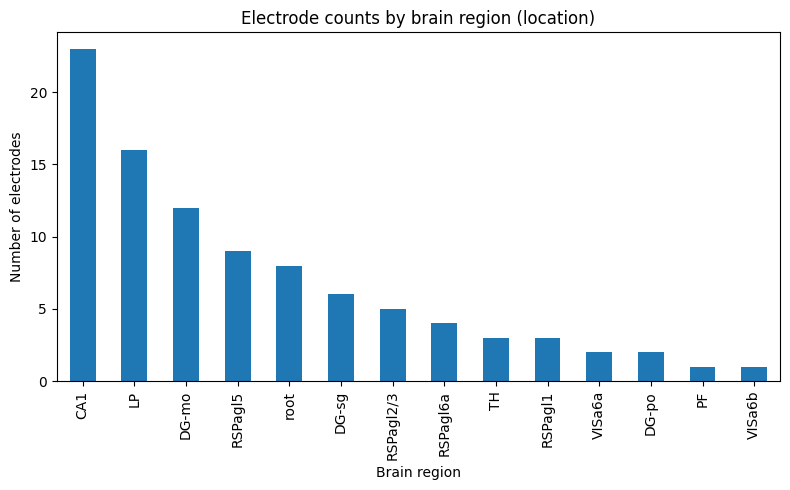

In [4]:
import matplotlib.pyplot as plt

counts = elec_df['location'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8,5))
counts.plot(kind="bar")
plt.title("Electrode counts by brain region (location)")
plt.xlabel("Brain region")
plt.ylabel("Number of electrodes")
plt.tight_layout()
plt.show()

**Interpretation:**  
This distribution shows the strongest sampling in CA1 and LP, with more moderate or sparse coverage in other regions.  
This helps users identify which areas are most represented in subsequent analyses.

## Visualization: LFP signals for selected channels

The following code plots the first 5 seconds of LFP data from five channels, illustrating the temporal structure and amplitude of local field potentials.

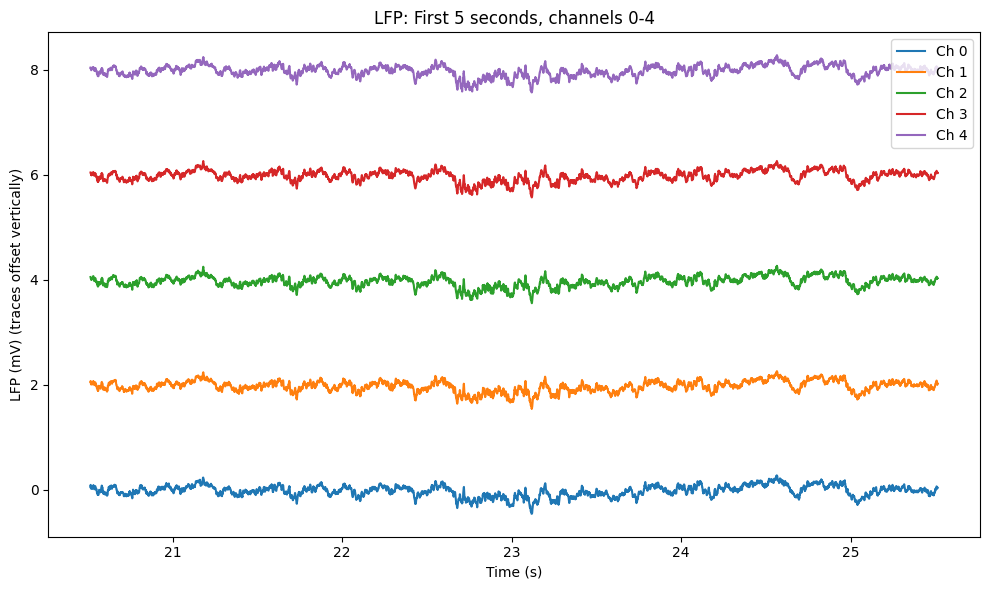

In [5]:
import numpy as np

probe_0_lfp_data = nwb.acquisition["probe_0_lfp_data"]
timestamps = probe_0_lfp_data.timestamps  # shape (samples,)
data = probe_0_lfp_data.data              # shape (samples, channels)

# Plot first 5 seconds for channels 0-4
sample_mask = (timestamps[:] <= timestamps[0] + 5)
sample_indices = np.where(sample_mask)[0]

channels_to_plot = range(5)
plt.figure(figsize=(10, 6))
for i, ch in enumerate(channels_to_plot):
    plt.plot(timestamps[sample_indices], data[sample_indices, ch] * 1e3 + i*2, label=f'Ch {ch}')
plt.xlabel("Time (s)")
plt.ylabel("LFP (mV) (traces offset vertically)")
plt.title("LFP: First 5 seconds, channels 0-4")
plt.legend()
plt.tight_layout()
plt.show()

**Interpretation:**  
This segment shows plausible neural activity in multiple channels, with each trace offset for clear comparison.  
Note that amplitude and timing reflect real LFP fluctuations, not baseline-corrected or filtered further.

## Summary and future directions

- This notebook demonstrated how to access and summarize a representative NWB file from Dandiset 000690.
- It provided a preview of subject/session metadata, probe/channel mapping, spatial coverage, and raw LFP signals.
- **For further analyses, users might:**
  - Explore additional probes or sessions (edit the NWB URL/asset path)
  - Examine relationships between stimulus timing and neural signals
  - Analyze spectral properties (e.g., power in theta, gamma bands)
  - Investigate data quality, select channels by region, or cross-reference with spike/unit data

Be sure to consult the Dandiset page and NWB documentation for in-depth understanding of file structures and scientific context.  
Always verify outputs of AI-generated code and interpret plots with care.